In [1]:
import ROOT

Welcome to JupyROOT 6.22/02


In [2]:
f = ROOT.TFile.Open("/home/josesito/Documentos/Untitled Folder/Tracks_Clusters.root") 

In [3]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

In [4]:
tree = f.Get("JetRecoTree")
tree.Print()
tree.GetEntries()

102900

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

In [62]:
hist_npv = ROOT.TH1F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50)

Warning in <TFile::Append>: Replacing existing TH1: NPV (Potential memory leak).


In [64]:
for event in tree:
    hist_npv.Fill(tree.NPV)
    
print("Done!")

Done!


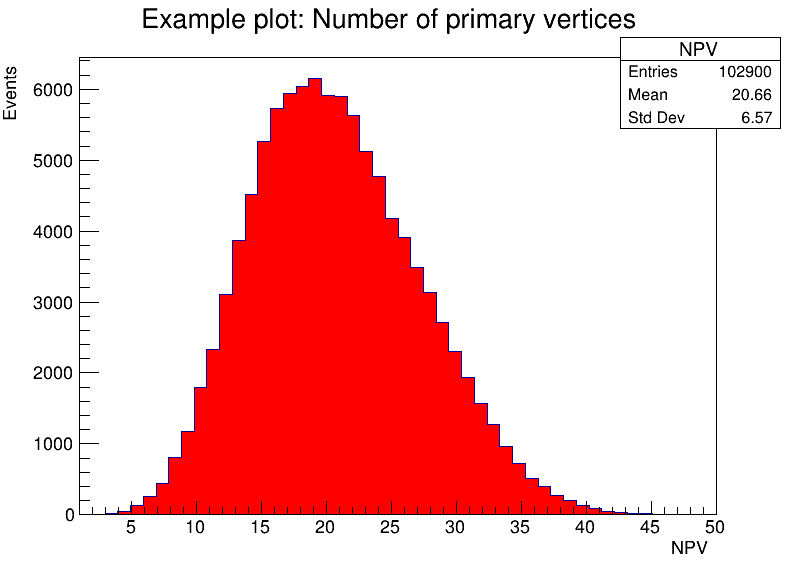

In [65]:
hist_npv.SetFillColor(2)
hist_npv.Draw()
canvas.Draw()

In [8]:
scale = hist_npv.Integral()
hist_npv.Scale(1/scale)
hist_npv.SetFillColor(2)

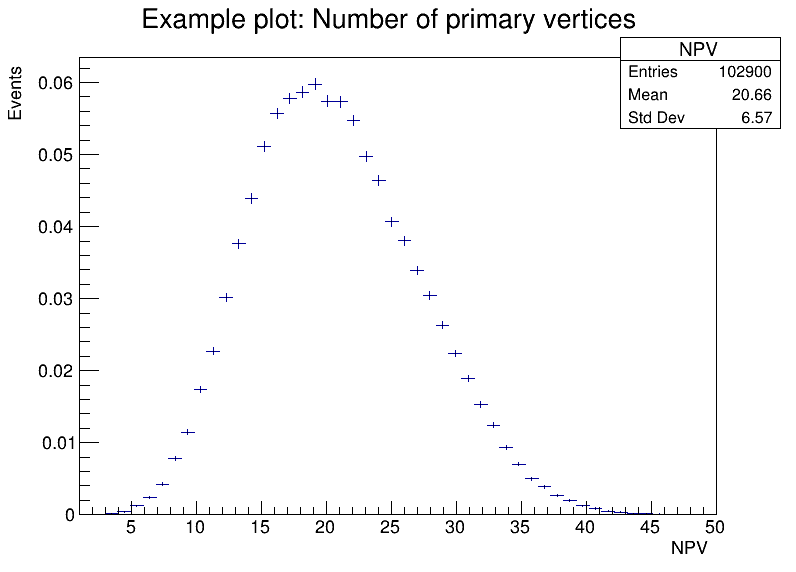

In [9]:
hist_npv.Draw()
canvas.Draw("hist_npv")

Excercise 1. Plot the number of average interactions per bunch-crossing (mu_average)

In [10]:
hist_mu = ROOT.TH1F("mu_average","Number of average interactions; mu ; Events ",100,1,100)

In [11]:
for event in tree:
    hist_mu.Fill(tree.mu_average)
    
print("Done!")

Done!


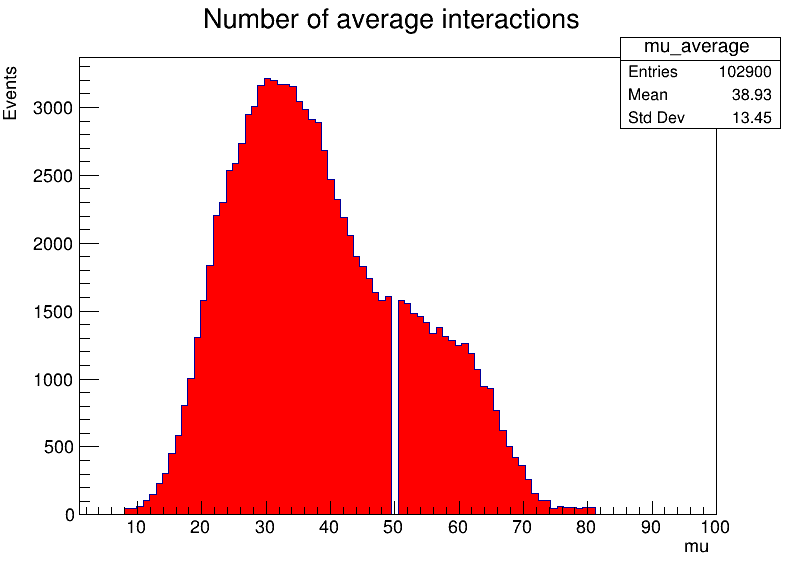

In [12]:
hist_mu.SetFillColor(2)
hist_mu.Draw()
canvas.Draw()

In [13]:
scale = hist_mu.Integral()
hist_mu.Scale(1/scale)
hist_mu.SetFillColor(2)

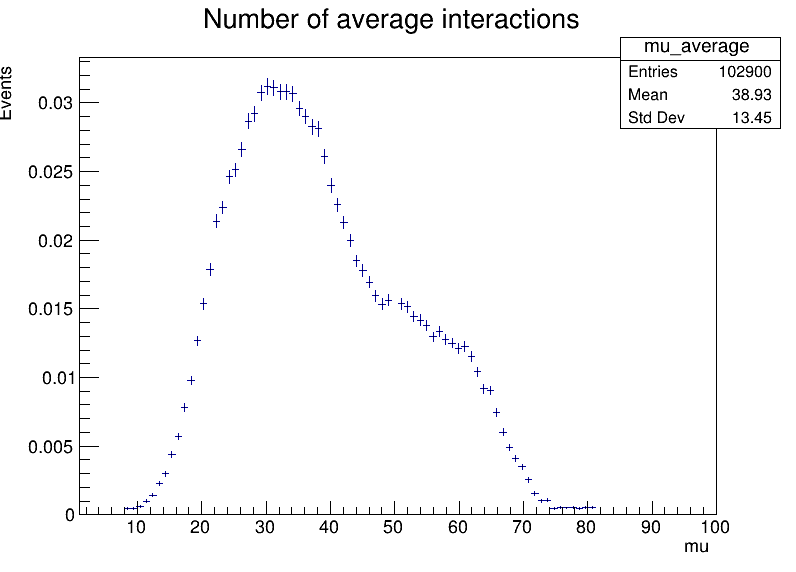

In [14]:
hist_mu.Draw()
canvas.Draw("hist_mu")

Excercise 2. 2D histogram of NPV vs. mu 

In [15]:
hist_npv_mu = ROOT.TH2F("NPV vs average" ,"Example plot: Number of primary vertices; NPV ; mu average ",100,1,60,100,1,100)

In [16]:
for event in tree:
    hist_npv_mu.Fill(tree.NPV, tree.mu_average)
    
print("Done!")

Done!


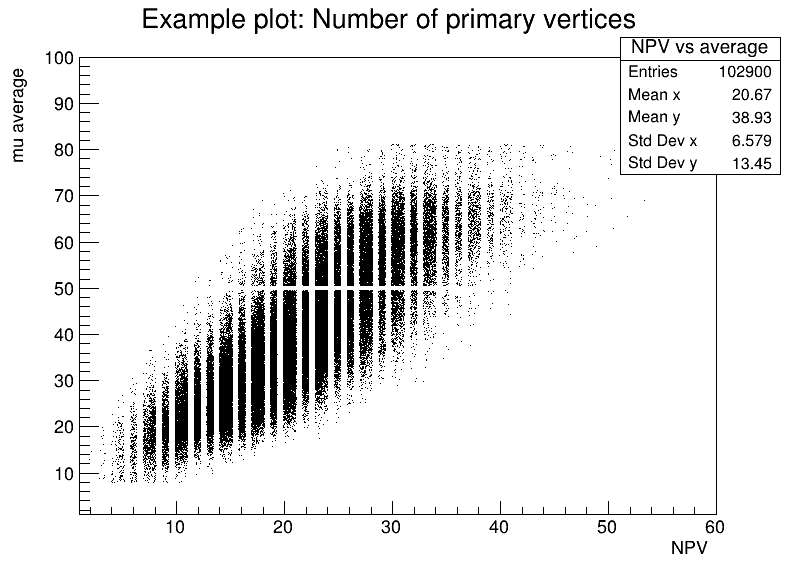

In [17]:
hist_npv_mu.SetFillColor(2)
hist_npv_mu.Draw()
canvas.Draw()

Now two histograms are created to store the number of tracks and clusters

In [18]:
hist_nTrks = ROOT.TH1F("NTracks","Example plot: Number of tracks; NTracks ; Events ",50,0,1000)
hist_nCltrs = ROOT.TH1F("NClusters","Example plot: Number of clusters; NClusters ; Events ",50,0,1000)

In [19]:
for event in tree:
    hist_nTrks.Fill(tree.Tracks_pt.size())
    hist_nCltrs.Fill(tree.Clusters_pt.size())
    
print("Done!")

Done!


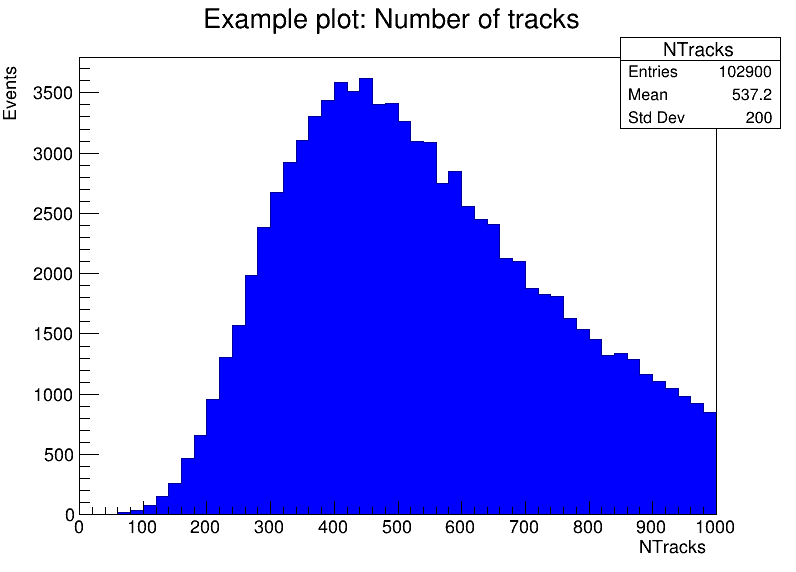

In [20]:
hist_nTrks.SetFillColor(4)
hist_nTrks.Draw()
canvas.Draw()

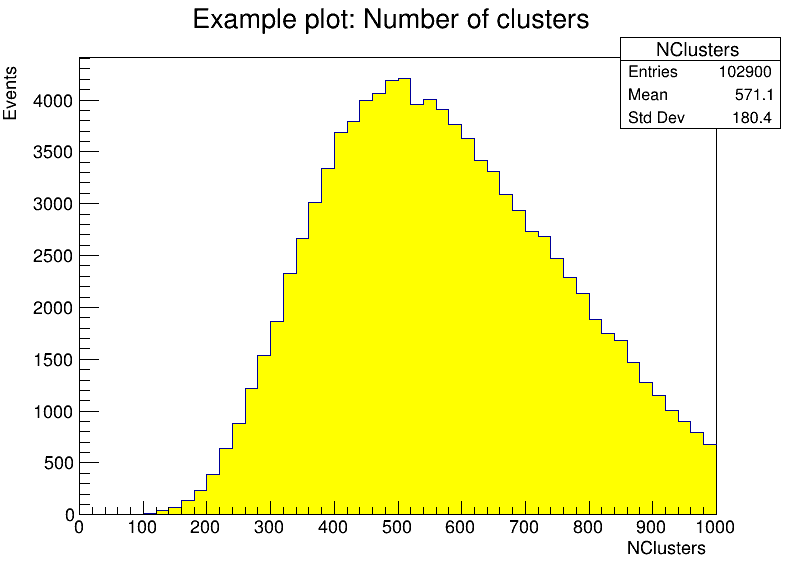

In [21]:
hist_nCltrs.SetFillColor(5)
hist_nCltrs.Draw()
canvas.Draw()

Excercise 3: Histograms of NPV and mu average vs number of tracks and number of clusters.

In [23]:
hist_npv_nTracks = ROOT.TH2F("NPV vs nTrack" ,"Number of primary vertices vs Number of tracks; NPV ; nTracks ",60,1,60,50,0,1200)
hist_npv_nClusters = ROOT.TH2F("NPV vs nClusters" ,"Number of primary vertices vs Number of clusters; NPV ; nClusters ",60,1,60,50,0,1200)

Warning in <TFile::Append>: Replacing existing TH1: NPV vs nTrack (Potential memory leak).


In [25]:
for event in tree:
    hist_npv_nTracks.Fill(tree.NPV, tree.Tracks_pt.size())
    hist_npv_nClusters.Fill(tree.NPV, tree.Clusters_pt.size())
    
print("Done!")

Done!


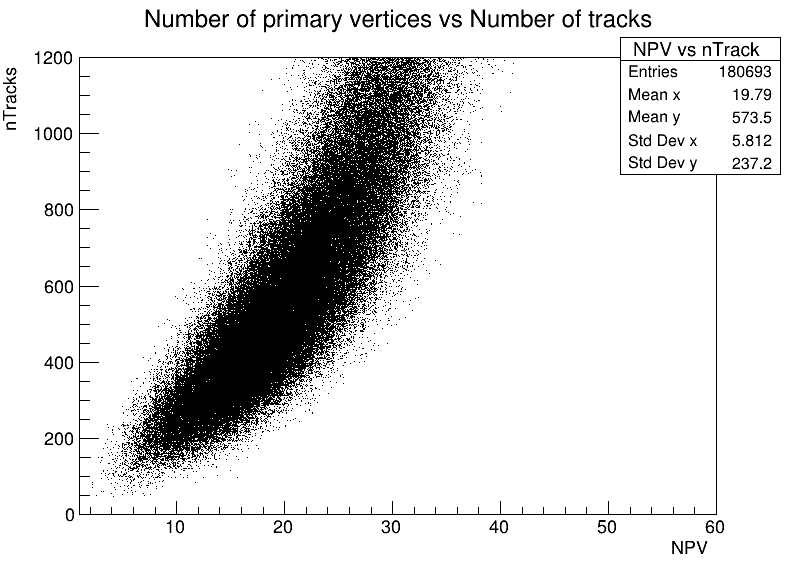

In [27]:
hist_npv_nTracks.SetFillColor(4)
hist_npv_nTracks.Draw()
canvas.Draw()

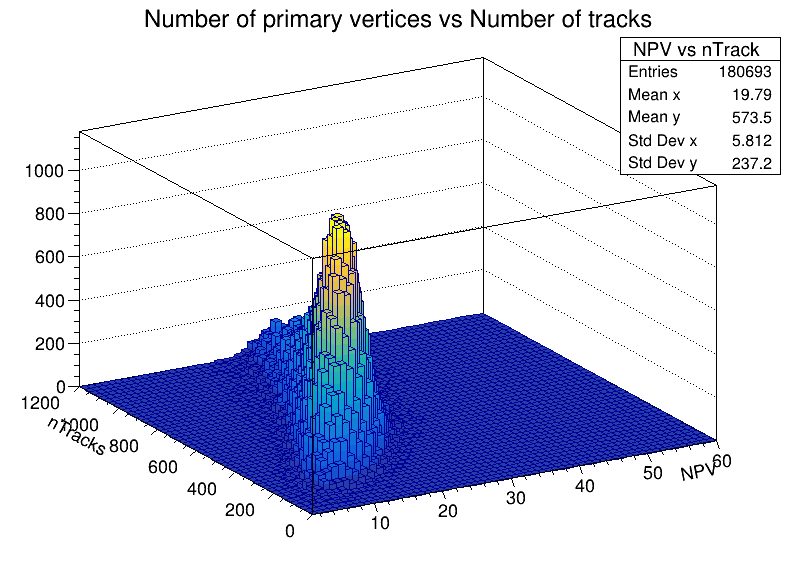

In [42]:
hist_npv_nTracks.SetFillColor(4)
hist_npv_nTracks.Draw("Lego2")
canvas.Draw()

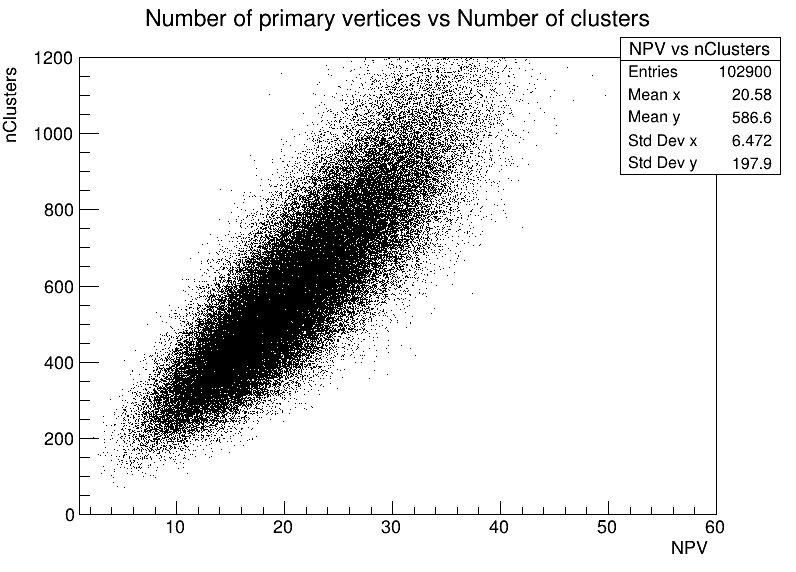

In [41]:
hist_npv_nClusters.SetFillColor(4)
hist_npv_nClusters.Draw()
canvas.Draw()

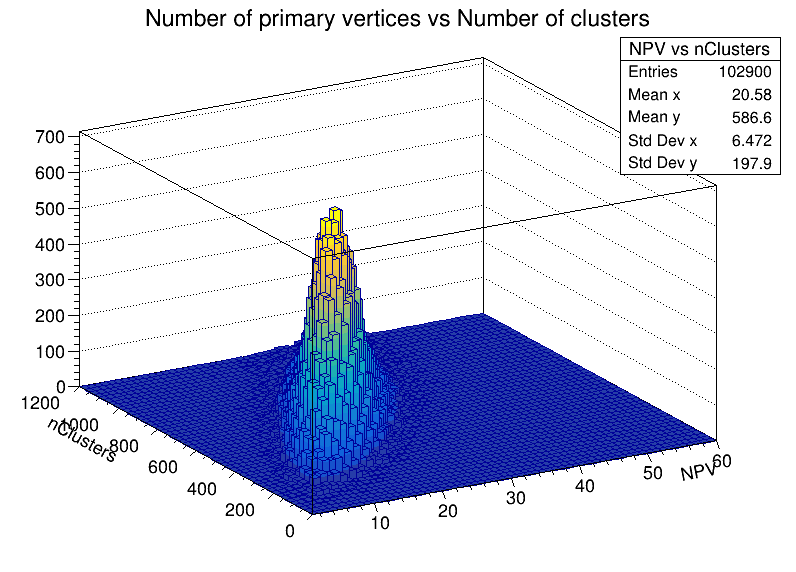

In [40]:
hist_npv_nClusters.SetFillColor(4)
hist_npv_nClusters.Draw("Lego2")
canvas.Draw()

In [38]:
hist_mu_nTracks = ROOT.TH2F("mu average vs nTrack" ,"mu average vs Number of tracks; mu average ; nTracks ",60,1,60,50,0,1200)
hist_mu_nClusters = ROOT.TH2F("mu average vs nClusters" ,"mu average vs Number of clusters; mu average ; nClusters ",60,1,60,50,0,1200)

In [43]:
for event in tree:
    hist_mu_nTracks.Fill(tree.mu_average, tree.Tracks_pt.size())
    hist_mu_nClusters.Fill(tree.mu_average, tree.Clusters_pt.size())
    
print("Done!")

Done!


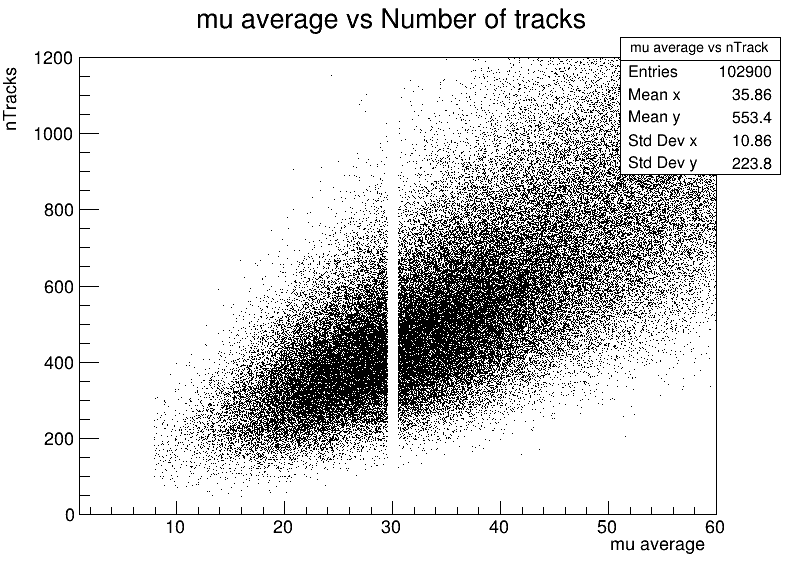

In [44]:
hist_mu_nTracks.SetFillColor(4)
hist_mu_nTracks.Draw()
canvas.Draw()

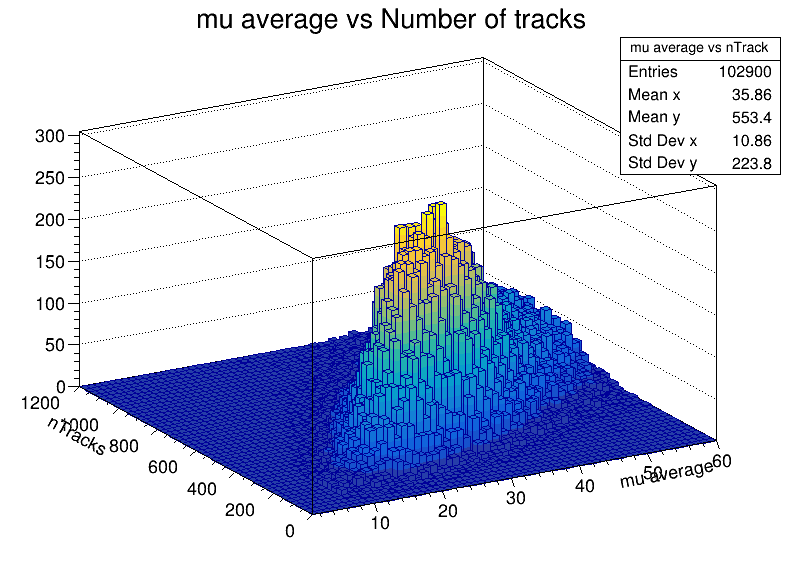

In [45]:
hist_mu_nTracks.SetFillColor(4)
hist_mu_nTracks.Draw("Lego2")
canvas.Draw()

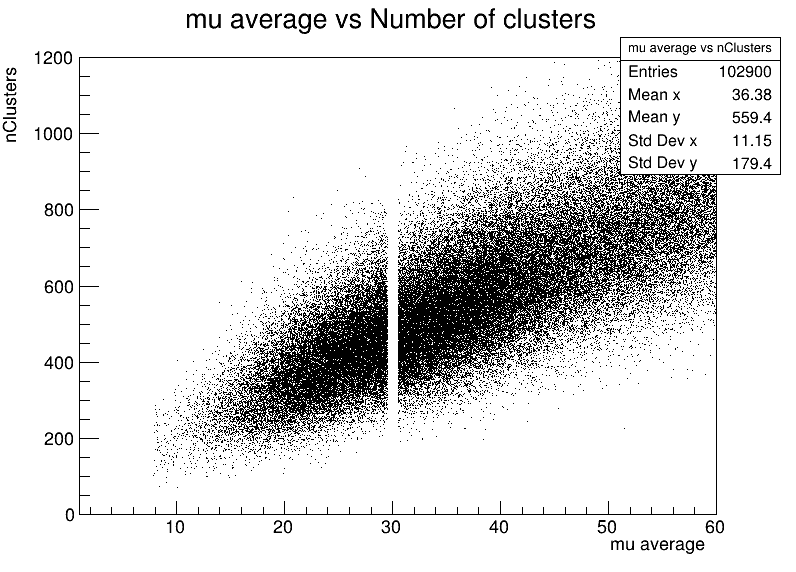

In [46]:
hist_mu_nClusters.SetFillColor(4)
hist_mu_nClusters.Draw()
canvas.Draw()

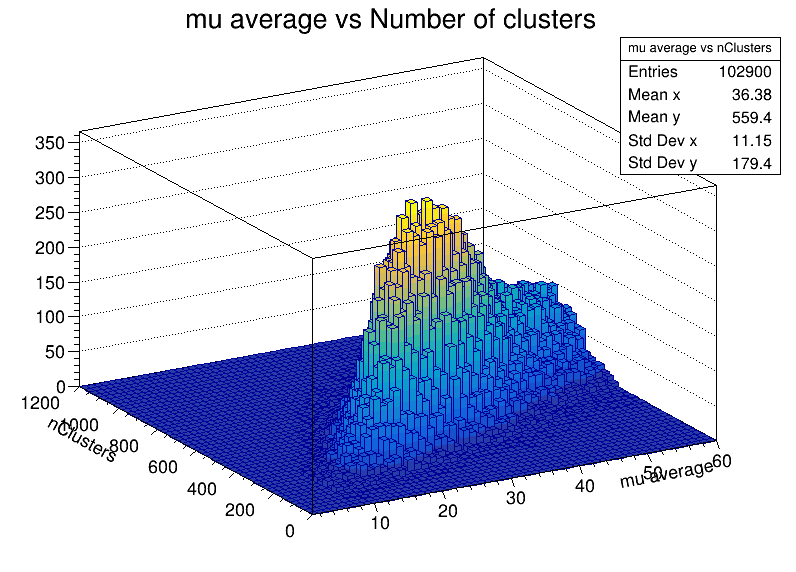

In [47]:
hist_mu_nClusters.SetFillColor(4)
hist_mu_nClusters.Draw("Lego2")
canvas.Draw()

Now plot the pt of the lead track

In [48]:
hist_track_pT = ROOT.TH1F("Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,100,1000)

In [49]:
for event in tree:
    for tr in range(tree.Tracks_pt.size()):
        hist_track_pT.Fill(tree.Tracks_pt.at(tr))
    
print("Done!")

Done!


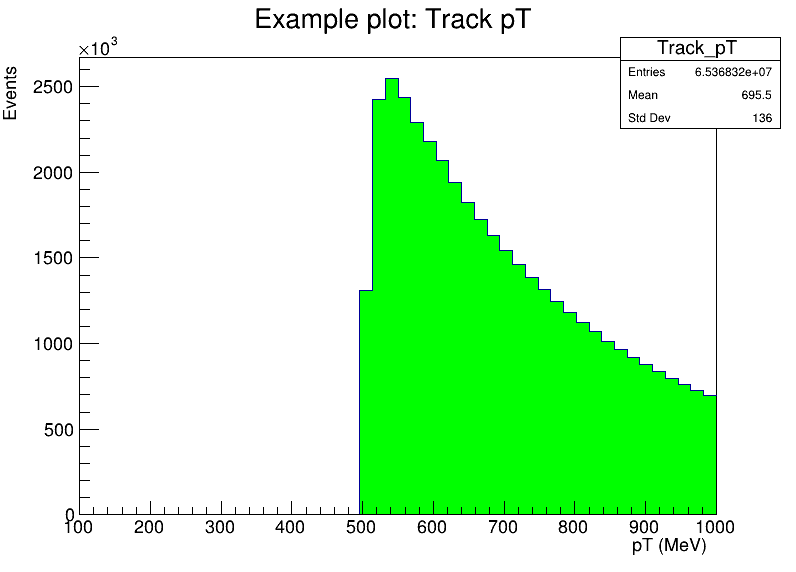

In [52]:
hist_track_pT.SetFillColor(3)
hist_track_pT.Draw()
canvas.Draw()

Excecise 4 Plot for tracks 

In [68]:
hist_track_eta = ROOT.TH1F("Track_eta","Example plot: Track eta; eta (rad) ; Events ",50,-6,6)

Warning in <TFile::Append>: Replacing existing TH1: Track_eta (Potential memory leak).


In [70]:
for event in tree:
    for tr in range(tree.Tracks_eta.size()):
        hist_track_eta.Fill(tree.Tracks_eta.at(tr))
    
print("Done!")

Done!


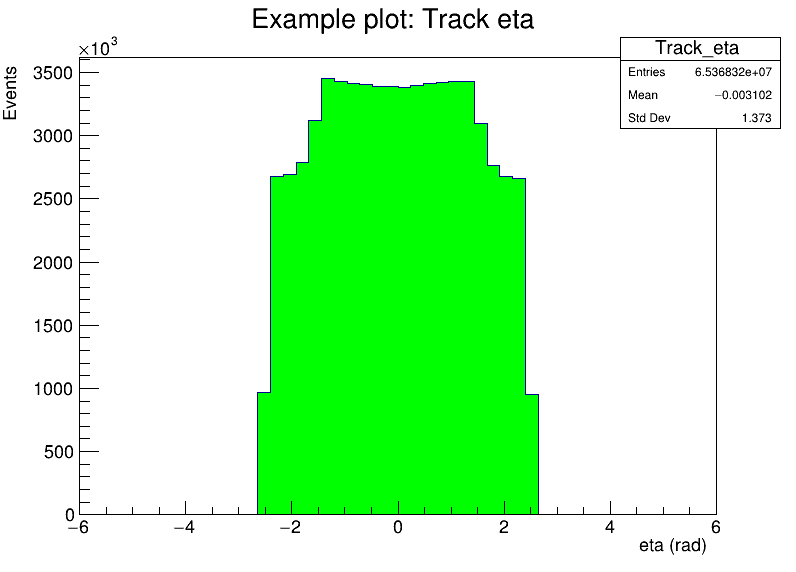

In [71]:
hist_track_eta.SetFillColor(3)
hist_track_eta.Draw()
canvas.Draw()

In [5]:
hist_track_phi = ROOT.TH1F("Tracks_phi","Example plot: Track eta; phi (rad) ; Events ",50,-6,6)

In [6]:
for event in tree:
    for tr in range(tree.Tracks_phi.size()):
        hist_track_phi.Fill(tree.Tracks_phi.at(tr))
    
print("Done!")

Done!


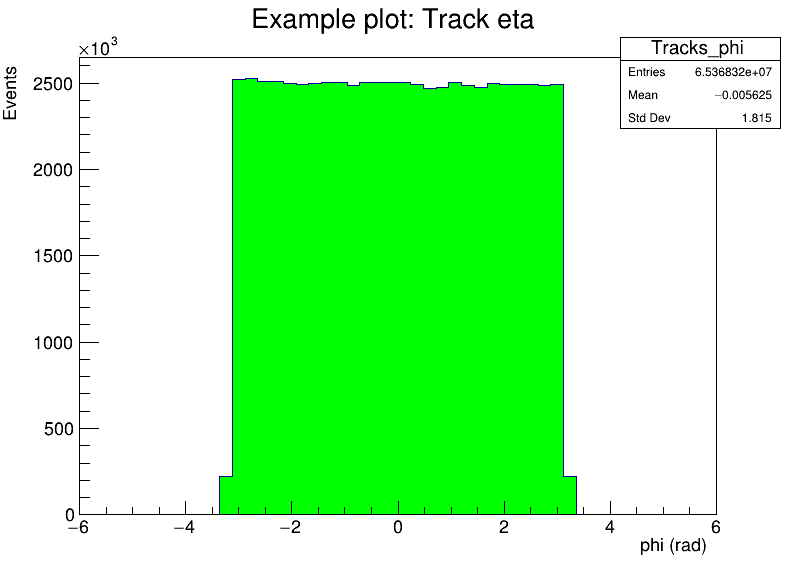

In [8]:
hist_track_phi.SetFillColor(3)
hist_track_phi.Draw()
canvas.Draw()

In [9]:
hist_track_m = ROOT.TH1F("Track_m","Example plot: Track m; m (MeV) ; Events ",50,-2000,2000)

In [10]:
for event in tree:
    for tr in range(tree.Tracks_m.size()):
        hist_track_m.Fill(tree.Tracks_m.at(tr))
    
print("Done!")

Done!


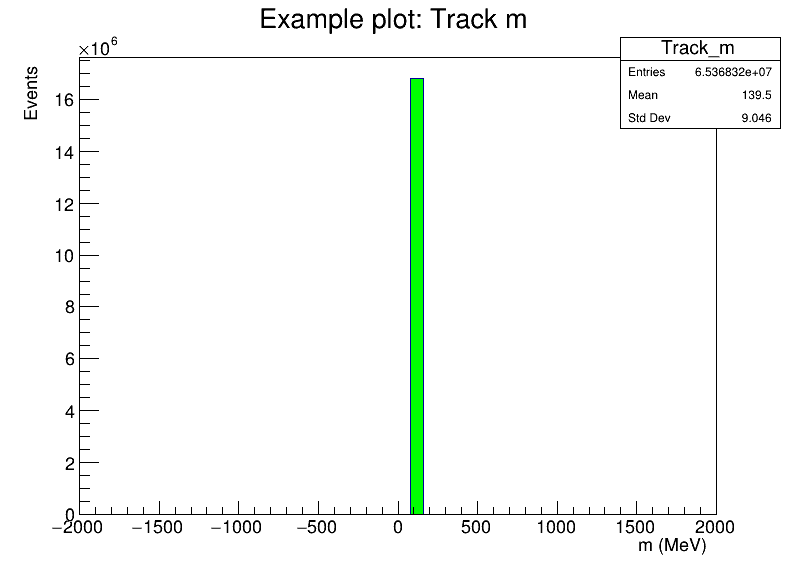

In [11]:
hist_track_m.SetFillColor(3)
hist_track_m.Draw()
canvas.Draw()

In [12]:
hist_track_vtx = ROOT.TH1F("Track_vtx","Example plot: Track vtx; vtx ; Events ",50,-10,50)

In [13]:
for event in tree:
    for tr in range(tree.Tracks_vtx.size()):
        hist_track_vtx.Fill(tree.Tracks_vtx.at(tr))
    
print("Done!")

Done!


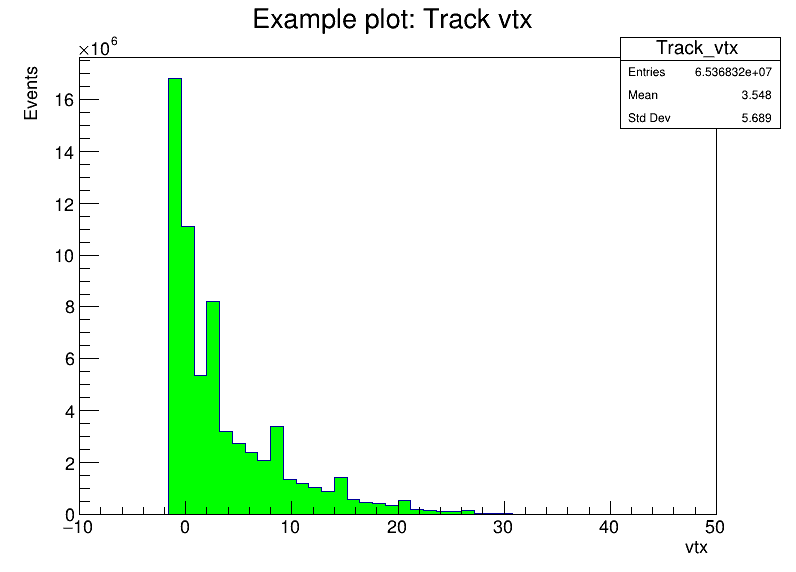

In [14]:
hist_track_vtx.SetFillColor(3)
hist_track_vtx.Draw()
canvas.Draw()

In [6]:
hist_clstrs_pt = ROOT.TH1F("Clstrs_pt","Example plot: Clusters pt; pt (MeV); Events ",50,1,2500)

Warning in <TFile::Append>: Replacing existing TH1: Clstrs_pt (Potential memory leak).


In [7]:
for event in tree:
    for tr in range(tree.Clusters_pt.size()):
        hist_clstrs_pt.Fill(tree.Clusters_pt.at(tr))
    
print("Done!")

Done!


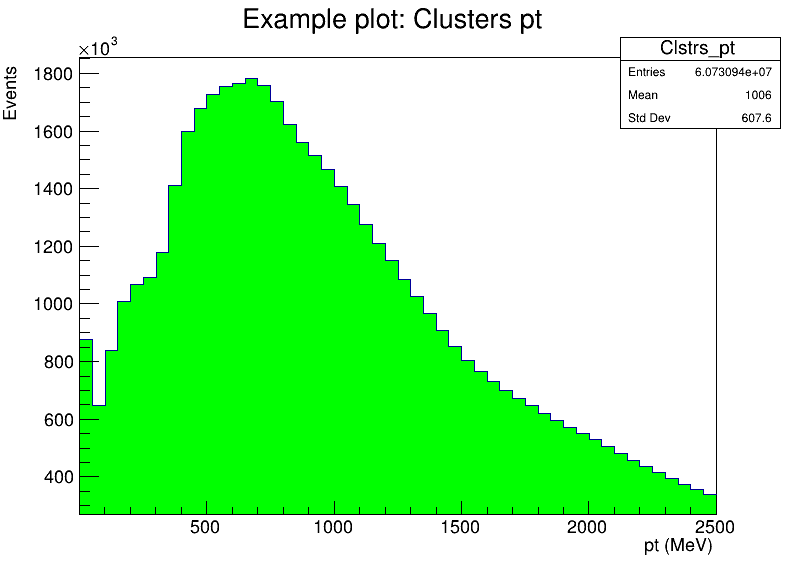

In [8]:
hist_clstrs_pt.SetFillColor(3)
hist_clstrs_pt.Draw()
canvas.Draw()

In [9]:
hist_clstrs_eta = ROOT.TH1F("Clstrs_eta","Example plot: Clusters eta; eta (rad); Events ",50,-6,6)

In [10]:
for event in tree:
    for tr in range(tree.Clusters_eta.size()):
        hist_clstrs_eta.Fill(tree.Clusters_eta.at(tr))
    
print("Done!")

Done!


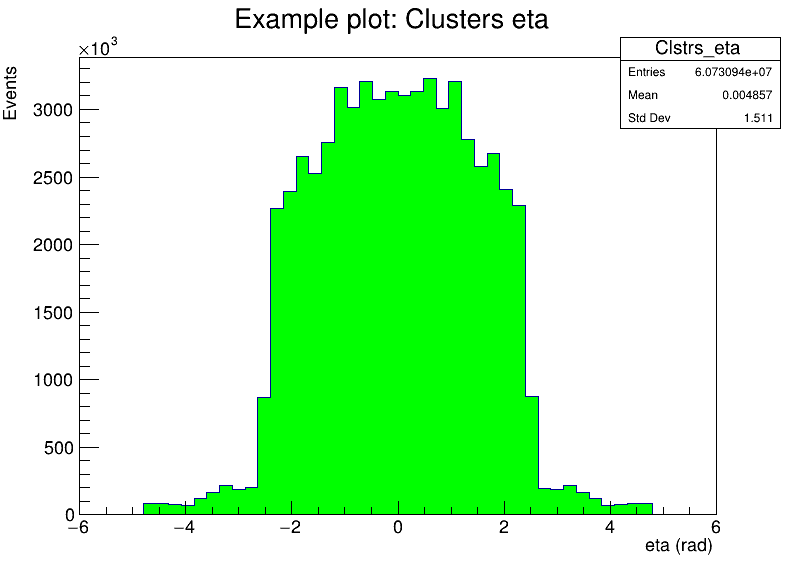

In [11]:
hist_clstrs_eta.SetFillColor(3)
hist_clstrs_eta.Draw()
canvas.Draw()

In [12]:
hist_clstrs_phi = ROOT.TH1F("Clstrs_phi","Example plot: Clusters phi; phi (rad); Events ",50,-6,6)

In [13]:
for event in tree:
    for tr in range(tree.Clusters_phi.size()):
        hist_clstrs_phi.Fill(tree.Clusters_phi.at(tr))
    
print("Done!")

Done!


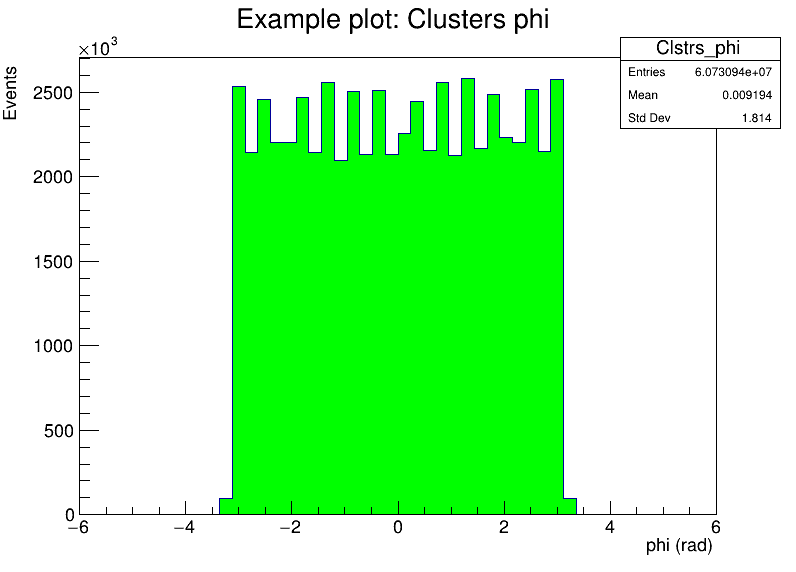

In [14]:
hist_clstrs_phi.SetFillColor(3)
hist_clstrs_phi.Draw()
canvas.Draw()

In [15]:
hist_clstrs_m = ROOT.TH1F("Clstrs_m","Example plot: Clusters m; m (MeV); Events ",50,-6,6)

In [16]:
for event in tree:
    for tr in range(tree.Clusters_m.size()):
        hist_clstrs_m.Fill(tree.Clusters_m.at(tr))
    
print("Done!")

Done!


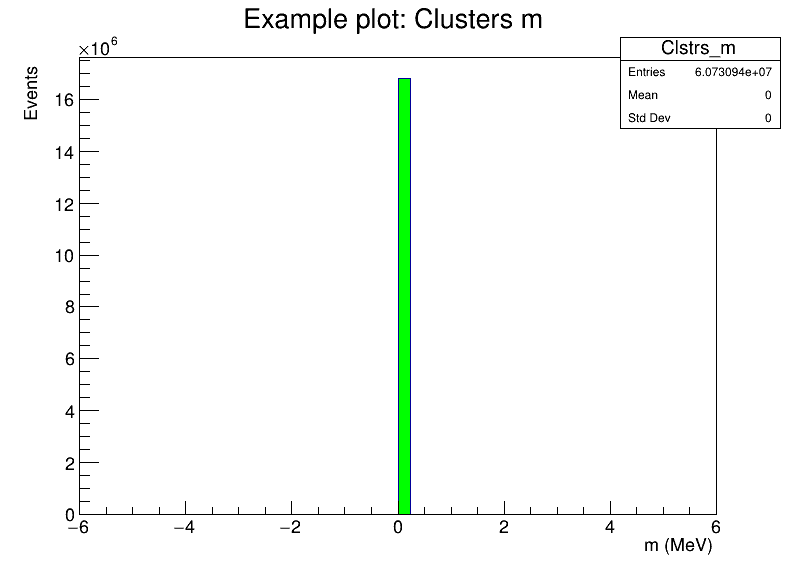

In [17]:
hist_clstrs_m.SetFillColor(3)
hist_clstrs_m.Draw()
canvas.Draw()

In [18]:
hist_prtcl_pt = ROOT.TH1F("partcls_pt","Example plot: Particles pt; pt (MeV); Events ",50,1,2500)

In [19]:
for event in tree:
    for tr in range(tree.Particles_pt.size()):
        hist_prtcl_pt.Fill(tree.Particles_pt.at(tr))
    
print("Done!")

Done!


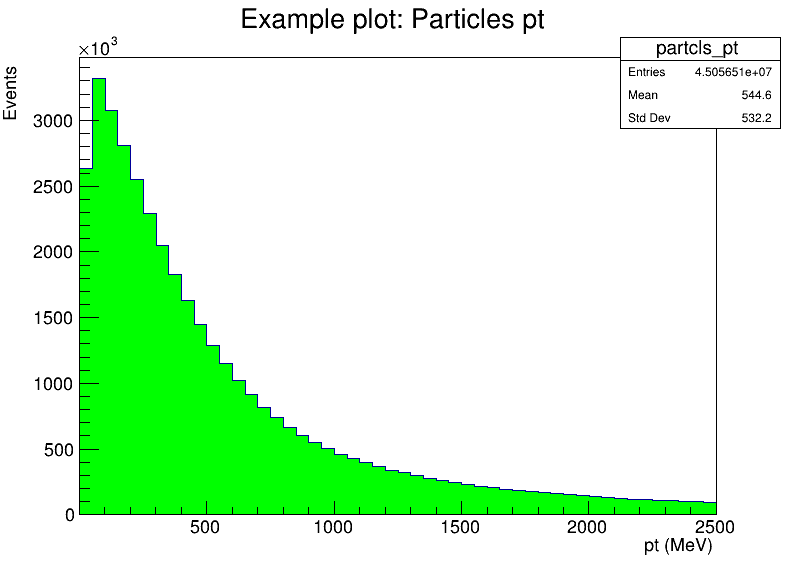

In [21]:
hist_prtcl_pt.SetFillColor(3)
hist_prtcl_pt.Draw()
canvas.Draw()

In [22]:
hist_prtcl_eta = ROOT.TH1F("partcls_eta","Example plot: Particles eta; eta (rad); Events ",50,-6,6)

In [23]:
for event in tree:
    for tr in range(tree.Particles_eta.size()):
        hist_prtcl_eta.Fill(tree.Particles_eta.at(tr))
    
print("Done!")

Done!


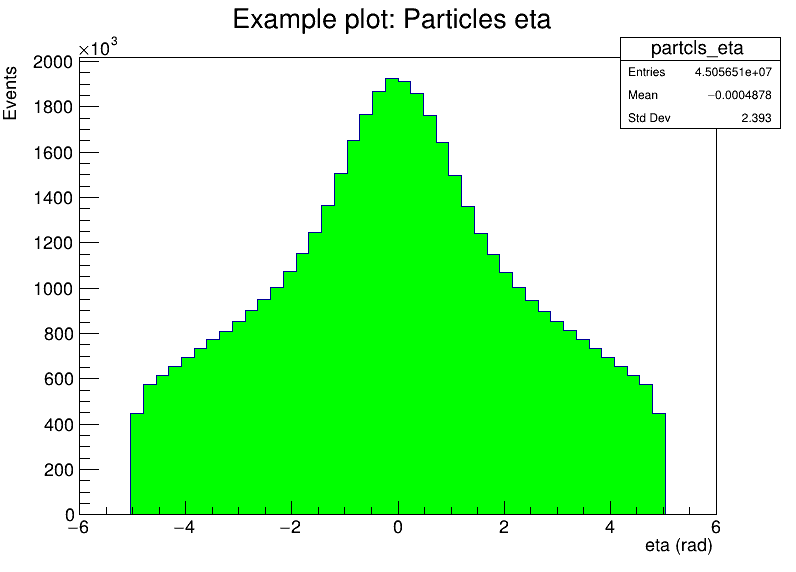

In [24]:
hist_prtcl_eta.SetFillColor(3)
hist_prtcl_eta.Draw()
canvas.Draw()

In [25]:
hist_prtcl_phi = ROOT.TH1F("partcls_phi","Example plot: Particles phi; phi (rad); Events ",50,-6,6)

In [26]:
for event in tree:
    for tr in range(tree.Particles_phi.size()):
        hist_prtcl_phi.Fill(tree.Particles_phi.at(tr))
    
print("Done!")

Done!


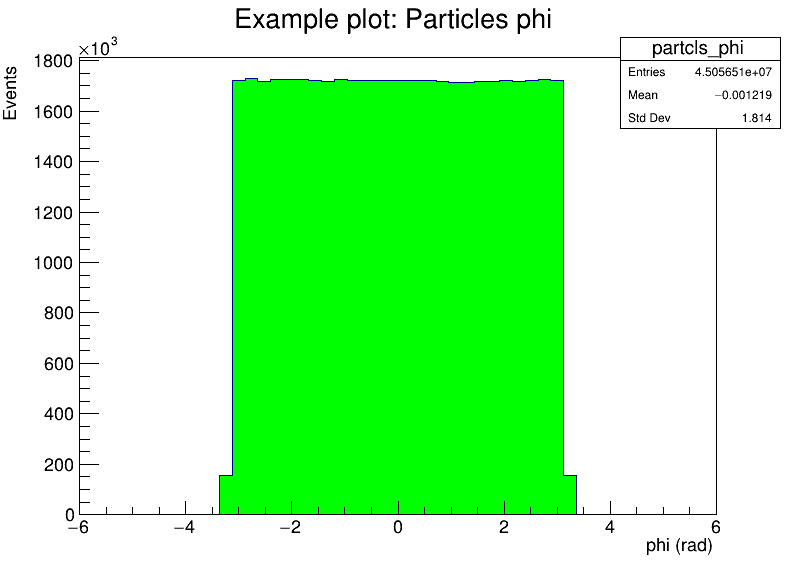

In [27]:
hist_prtcl_phi.SetFillColor(3)
hist_prtcl_phi.Draw()
canvas.Draw()

In [28]:
hist_prtcl_m = ROOT.TH1F("partcls_m","Example plot: Particles m; m (MeV); Events ",50,-100,200)

In [29]:
for event in tree:
    for tr in range(tree.Particles_m.size()):
        hist_prtcl_m.Fill(tree.Particles_m.at(tr))
    
print("Done!")

Done!


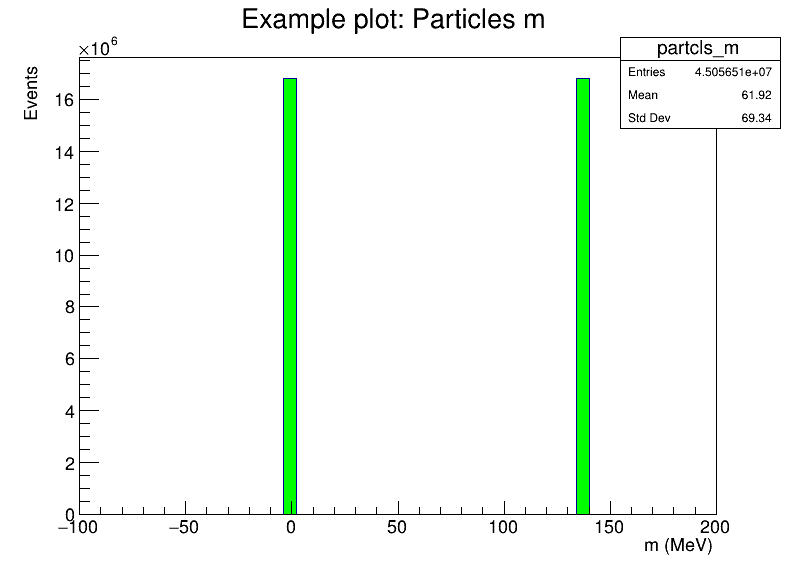

In [30]:
hist_prtcl_m.SetFillColor(3)
hist_prtcl_m.Draw()
canvas.Draw()

In [31]:
hist_prtcl_pdgID = ROOT.TH1F("partcls_pdgID","Example plot: Particles pdgID; pdgID; Events ",50,-5000,5000)

In [32]:
for event in tree:
    for tr in range(tree.Particles_pdgID.size()):
        hist_prtcl_pdgID.Fill(tree.Particles_pdgID.at(tr))
    
print("Done!")

Done!


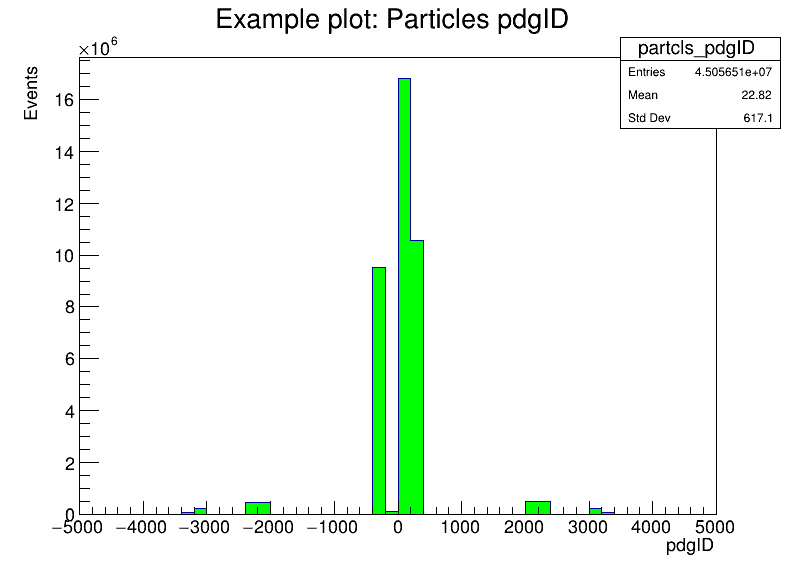

In [33]:
hist_prtcl_pdgID.SetFillColor(3)
hist_prtcl_pdgID.Draw()
canvas.Draw()

NPV is the number of primary vertices, this is the number of simultaneous collisions in the beam.


mu average represents the expected number of collisions considering many beams.

Tracks variables correspond in some way, to the path particles describe. NPV are the primary metric for tracking.

Clusters variables correspond to information obtained from the calorimeters layout in the detector. Mu average is the primary metric for calorimeters.

Information of events in tracks and the clusters related to the energies, angles of scattering and masses are obtained from the trackers and the calorimeters

The variable Particles relates both tracks and clusters showing overall information about the decay and the related measured variables

Particles PDG ID is numeric scheme  used to assign a unique code to each type of particle.
